<a href="https://colab.research.google.com/github/ArchanGhosh/GAN-/blob/master/3-Image_Classification_Using_CNN_on_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
#this is how they show in video on importing dataset
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#We can also import Dataset using this method
# from tensorflow.keras.datasets import fashion_mnist
# (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
# The Above lines with directly split the dataset into train, test as well as data items and their labels.


import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete897BI2/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete897BI2/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
#Labelling the datasets with their respective classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# we Basically Normalize both the test and train Dataset inbetween 0 and 1
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)


train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

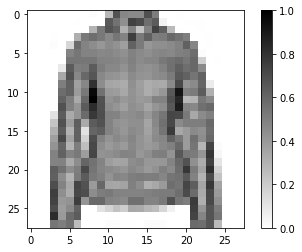

In [8]:

for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))


plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

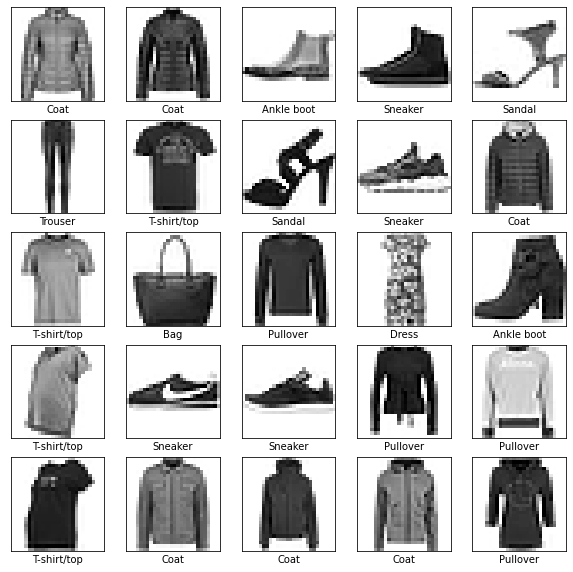

In [9]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])
#The above network can be changed and experimented with adding multiple layers to check the differences.
#This the base model as shown in the video can be further modified by adding layers or expanding a layer.

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3887 - accuracy: 0.8602
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2532 - accuracy: 0.9082
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2094 - accuracy: 0.9233
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1743 - accuracy: 0.9353
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1472 - accuracy: 0.9460
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1266 - accuracy: 0.9530
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1040 - accuracy: 0.9613
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0864 - accuracy: 0.9679
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0730 - accuracy: 0.9735
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.061

In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3283 - accuracy: 0.9166
Accuracy on test dataset: 0.9165999889373779


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [16]:
predictions.shape


(32, 10)

In [17]:
predictions[0]

array([-12.121056 , -12.991626 ,   1.8001324, -17.104353 ,   7.6255593,
       -14.061183 ,   3.5106902,  -7.575041 , -12.2428   ,  -7.2952557],
      dtype=float32)

In [18]:
np.argmax(predictions[0])

4

In [19]:
test_labels[0]

4

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

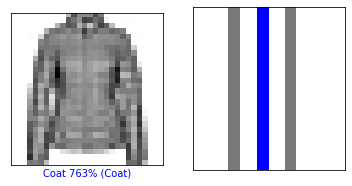

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

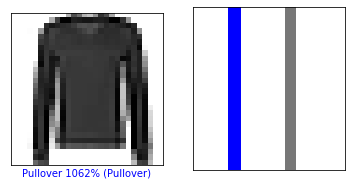

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

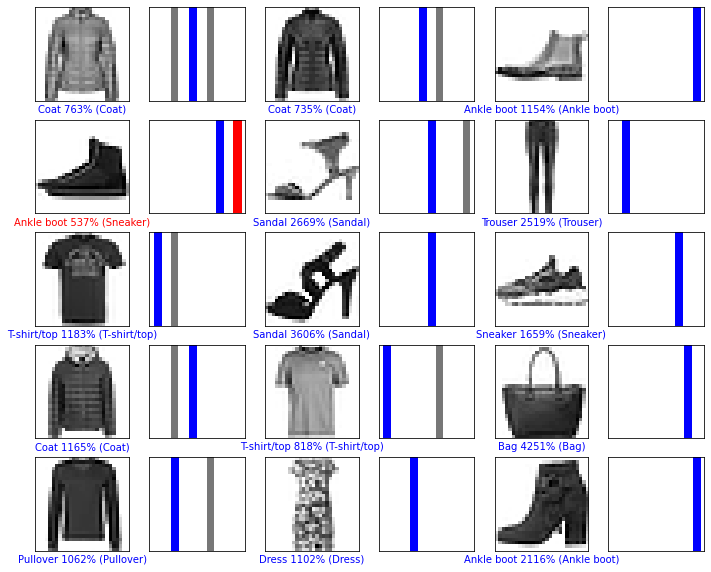

In [23]:
#the Following Graphs plots the predicted probabilities, with Blue Representing %Correct and Red for %false
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [24]:
#Taking an image from the dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [25]:
#Making a single batch from that image
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[-12.121055  -12.991627    1.8001325 -17.104353    7.625558  -14.061182
    3.5106897  -7.5750403 -12.242801   -7.2952557]]


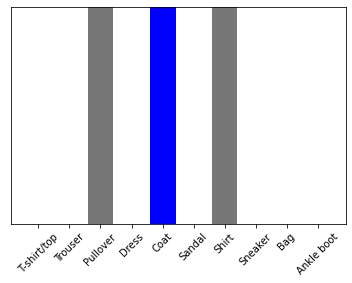

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

4